# Julia’s GaussianProcesses package

We demonstrate here the GaussianProcesses package which has been developed at STOR-i. If you have not already done so, you must install the package by running the following command:

In [ ]:
Pkg.add("GaussianProcesses");

Let’s start by considering a 1-dimensional GP. Firstly, we must load the packages. For plotting we use the Gadfly package.

In [1]:
using Gadfly, GaussianProcesses

INFO: Precompiling module Gadfly...
INFO: Recompiling stale cache file /home/jamie/.julia/lib/v0.4/Compose.ji for module Compose.
INFO: Recompiling stale cache file /home/jamie/.julia/lib/v0.4/DataArrays.ji for module DataArrays.
INFO: Recompiling stale cache file /home/jamie/.julia/lib/v0.4/DataFrames.ji for module DataFrames.
INFO: Recompiling stale cache file /home/jamie/.julia/lib/v0.4/KernelDensity.ji for module KernelDensity.
INFO: Recompiling stale cache file /home/jamie/.julia/lib/v0.4/ScikitLearnBase.ji for module ScikitLearnBase.


A Gaussian process is defined by its mean and covariance function. It’s common to assume
a zero mean Gaussian process (i.e. $\mathbb{E}[f (x)] = 0,\ \forall x$. Note: this can often be achieved by
transforming the data $y = f (x) − \mathbb{E} [f (x)]$.
There are lots of possible covariance functions (often referred to as kernels) that could be
used. Possibly the most popular is the squared exponential kernel, which we’ll use here.

In [2]:
mZero = MeanZero()        # Zero mean function
logℓ, logσ = 0.0, 0.0     # Length and scale parameters (log-scale)
kern = SEIso(logℓ, logσ)  # Isotropic squared exponential kernel

Type: GaussianProcesses.SEIso, Params: [0.0,0.0]


One of the nice features of the package is that you can easily access function and object documentation:

In [3]:
?SEIso

search: SEIso InsertionSort set_bigfloat_precision MersenneTwister



# Description

Constructor for the isotropic Squared Exponential kernel (covariance)

k(x,x') = σ²exp(-(x-x')ᵀ(x-x')/2ℓ²)

# Arguments:

  * `ll::Float64`: Log of the length scale ℓ
  * `lσ::Float64`: Log of the signal standard deviation σ


Using the specified mean and covariance functions we can sample from the GP prior:

In [4]:
gp = GP(m=mZero, k=kern)

GP object:
  Dim = 0
  Number of observations = 0
  Mean function:
    Type: GaussianProcesses.MeanConst, Params: [0.0]
  Kernel:
    Type: GaussianProcesses.SEIso, Params: [0.0,0.0]
  Input observations = 
0x0 Array{Float64,2}
  Output observations = Float64[]
  Variance of observation noise = 0.0
  Marginal Log-Likelihood = 0.0

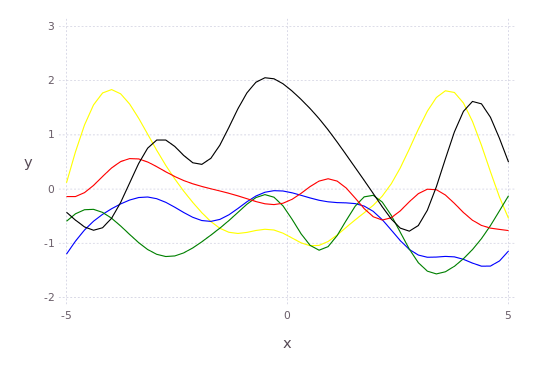

In [5]:
# Sample 5 paths from the GP prior
x = collect(linspace(-5,5)); # choose a range for paths
sample_paths = rand(gp, x, 5)

# Plot sample paths of the prior
colors = [colorant"black", colorant"red", colorant"green",
          colorant"blue", colorant"yellow"]
layers = []
for i in 1:5
    push!(layers, layer(x=x,y=sample_paths[:,i],Geom.line,
                        Theme(default_color=colors[i])))
end

plot(layers...)

The package also supports the following 1-dimensional kernels (i.e. isotropic kernels):
- Matern (1/2): `Mat12Iso`
- Matern (3/2):  `Mat32Iso`
- Matern (5/2):  `Mat52Iso`
- Linear: `LinIso`
- Rational Quadratic: `RQIso`
- Periodic: `Periodic`
- Polynomial: `Poly`

For details on the above kernels check the package documentation or check out this resource http://www.people.seas.harvard.edu/~dduvenaud/cookbook/.

## Exercises:
1. What happens when you type ```gp``` or `show(gp)`?
2. Try using one of the above kernels and refit the data.
3. What happens if you add or multiple kernels together
e.g. `kern = Mat(5/2,[0.0,0.0],0.0) + SE(0.0,0.0)`?

We can fit observation data to our Gaussian Process object using the fit! on our object.

In [6]:
x=[-4.0,-3.0,-1.0,0.0,2.0]; # Input observations
y=[-2.0,0.0,1.0,2.0,-1.0];  # Output observations
fit!(gp, x, y)

GP object:
  Dim = 1
  Number of observations = 5
  Mean function:
    Type: GaussianProcesses.MeanConst, Params: [0.0]
  Kernel:
    Type: GaussianProcesses.SEIso, Params: [0.0,0.0]
  Input observations = 
1x5 Array{Float64,2}:
 -4.0  -3.0  -1.0  0.0  2.0
  Output observations = [-2.0,0.0,1.0,2.0,-1.0]
  Variance of observation noise = 0.0
  Marginal Log-Likelihood = -10.264

The same GaussianProcess object could also have been fitted when it was constructed by using the command: `gp = GP(x, y, mZero, kern)`.

Gaussian process objects can be plotted. In the one dimensional case, the training data of the process is plotted along with the mean function and a 95% confidence interval.

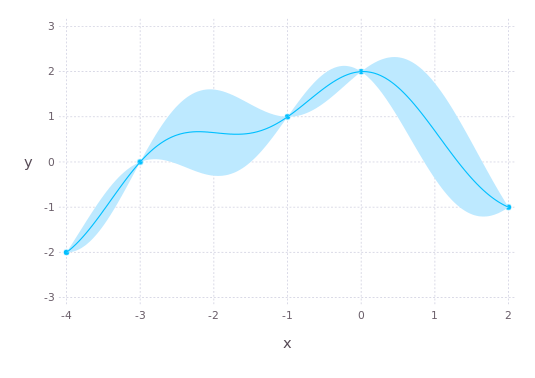

In [7]:
plot(gp)

As you may have noticed, changing the hyperparameters of a GP
(e.g. variance and length scale of the squared exponential kernel) results in different GPs. Ideally, we want to automate how these hyperparameters are tuned. We use maximum likelihood estimation to optimise the parameters.

In [8]:
optimize!(gp)

LoadError: LoadError: UndefVarError: method_lookup not defined
while loading In[8], in expression starting on line 1

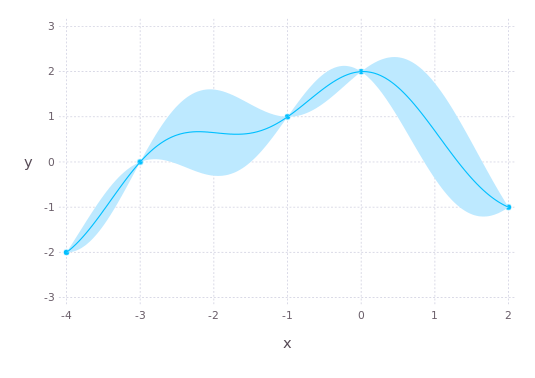

In [9]:
plot(gp)

Exercise:
1. The default optimisation algorithm for the GP package uses conjugate gradients, what happens if you use a different algorithm? Check out https://github.com/JuliaOpt/Optim.jl

More information about the package, including further examples, can be found here https:
//github.com/STOR-i/GaussianProcesses.jl. Let’s us know if you want to be
involved in the development of this package. Feedback is also very welcome.